In [86]:
import numpy as np
import pandas as pd
import torch
from PIL import Image
from fastai.data.external import untar_data, URLs
from fastai.torch_core import tensor, show_image

In [87]:
path = untar_data(URLs.MNIST_SAMPLE)

In [88]:
path.ls()

(#3) [Path('/Users/kreimben/.fastai/data/mnist_sample/valid'),Path('/Users/kreimben/.fastai/data/mnist_sample/labels.csv'),Path('/Users/kreimben/.fastai/data/mnist_sample/train')]

In [89]:
(path / 'train').ls()

(#2) [Path('/Users/kreimben/.fastai/data/mnist_sample/train/7'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3')]

간략하게 3과 7만 사용한다.

In [90]:
three = (path / 'train' / '3').ls().sorted()
seven = (path / 'train' / '7').ls().sorted()

three

(#6131) [Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10091.png')...]

In [91]:
im3_path = three[1]
im3 = Image.open(im3_path)
im3

In [92]:
np.array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [93]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [94]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## 픽셀 유사성으로 3과 7 구분하기

두 숫자 그룹에 대한 평균 픽셀값을 구하는것이다.

In [95]:
seven_tensors = [tensor(Image.open(o)) for o in seven]
three_tensors = [tensor(Image.open(o)) for o in three]
len(three_tensors), len(seven_tensors)

(6131, 6265)

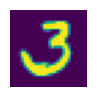

In [96]:
show_image(three_tensors[123]);

모든 이미지를 대상으로 각 픽셀 위치의 전체 평균을 계산하여 각 픽셀의 강도를 구하는 것이 목표였다. 그러려면 리스트 내의 모든 이미지를 3차원 텐서 하나로 결합해야한다. 일반적으로 3차원 텐서는 rank-3 텐서라고 함. 이렇게 컬렉션에 담긴 개별 텐서들을 쌓아 올려 단일 텐서를 만드는 일은 꽤 흔한 작업 패턴이다. 그래서 파이토치는 이 작업을 수행하는 stack이라는 함수를 제공한다.

평균 계산 등 파이토치가 제공하는 일부 연산은 정수 대신 부동소수형 데이터만을 지원하여, 작업에 따라 형 변환을 해야한다.

In [97]:
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [98]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

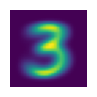

In [99]:
show_image(mean3);

<Axes: >

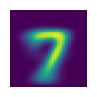

In [100]:
show_image(mean7)

In [101]:
stacked_threes.ndim

3

축이 3개라는 소리. 차원과 구별할 줄 알아야 함.

<Axes: >

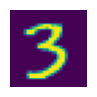

In [102]:
from random import randint

N = len(stacked_threes)

a_3 = stacked_threes[1]
show_image(a_3)

이상적인 숫자 3과의 거리를 어떻게 구할까?
1. 차이의 적댓값에 대한 평균을 구하는 (음수를 양수화) 방법. L1 노름 또는 평균절대차 (Mean Absolute Difference, MAD)라고 함.
1. 차이의 제곱(모든 수를 양수화 한다)에 대한 평균의 제굽근(제곱을 다시 원상태로 돌린다)을 구하는 방법. L2 노름 또는 평균제곱근오차 (Root Mean Squared Error, RMSE)라고 함.

In [103]:
# L1
dist_3_abs = (a_3 - mean3).abs().mean()
dist_7_abs = (a_3 - mean7).abs().mean()
dist_3_abs, dist_7_abs

(tensor(0.1114), tensor(0.1586))

In [104]:
# L2
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_3_sqr, dist_7_sqr

(tensor(0.2021), tensor(0.3021))

각 방법 모두에서 선택한 숫자 3 이미지는 '이상적인' 숫자 7보다 이상적인 숫자 3과의 거리가 더 짧습니다. 즉 간단히 만든 기준선 모델이 예측을 올바르게 수행했다고 볼 수 있다.
이것을 손실함수로 다시 측정해 보자.

In [105]:
from torch.nn.functional import l1_loss, mse_loss

l1_loss(a_3.float(), mean7), mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

결국 궁극적인 목표는 `is_3`라는 함수를 만들어 어떠한 이미지가 오더라도 3인지 7인지 구별할 수 있는 모델을 세우는것이다. 그렇게 하기 위해서는 두 이미지 사이의 거리를 계산해야 하므로, 거리의 개념부터 정의 해야함.

In [106]:
valid_3_tens = torch.stack(
    [tensor(Image.open(o)) for o in (path / 'valid' / '3').ls()]
)
valid_7_tens = torch.stack(
    [tensor(Image.open(o)) for o in (path / 'valid' / '7').ls()]
)

In [107]:
valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = valid_7_tens.float() / 255

In [108]:
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [109]:
def mnist_distance(a, b): return (a - b).abs().mean((-1, -2))
mnist_distance(a_3, mean3), mnist_distance(a_3, mean7)

(tensor(0.1114), tensor(0.1586))

그런데 전체 이미지에 대한 평가지표를 계산하려면, 검증용 데이터셋 내 **모든** 이미지와 이상적인 숫자 3 이미지의 거리를 계산해야 한다.

In [110]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [111]:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [112]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [113]:
is_3(valid_3_dist)

RuntimeError: The size of tensor a (1010) must match the size of tensor b (28) at non-singleton dimension 1

In [114]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

이렇게 하면 꽤나 신뢰성 높은 함수를 얻을 수 있다.

하지만, 더 나은 결과를 얻으려면 실제로 무언가를 학습하는 시스템을 시도해야 함. 즉 시스템이 스스로 자동 수정해나가도록 하는 방법이 필요하다.
이를 SGD로 해결해 보자.

특정 이미지와 '이상적인 이미지' 사이의 유사도를 찾는 대신, 개별 픽셀마다 가중치를 설정하고 숫자를 표현하는 검은색 픽셀의 가중치를 높이는 방법을 생각해보자. 가령 숫자 7 이미지 우측 하단에 위치한 픽셀은 활성화 될 가능성이 매우 낮지만, 숫자 3 이미지라면 해당 부분이 높은 확률로 활성화됨. 따라서 이미지 우측 하단 픽셀들의 가중치는 숫자 7에서는 낮게, 숫자 3에서는 높게 매겨짐. 이 과정은 이미지 픽셀(x)과 각 픽셀에 대한 가중치(w)를 입력받는 함수로 표현할 수 있다. 가령 숫자 3이 될 확률은 아래와 같다.

In [115]:
def pr_three(pixels, weight): return (pixels * weight).sum()

# MNIST loss function

In [116]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28 * 28)

In [117]:
train_y = tensor([1] * len(three_tensors) + [0] * len(seven_tensors)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [118]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

In [119]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28 * 28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [120]:
def init_params(size, std=1.0): return (torch.randn(size) * std).requires_grad_()
weights = init_params((28 * 28, 1))
weights

tensor([[-4.3672e-01],
        [-1.3954e+00],
        [-2.4402e-01],
        [-1.6689e+00],
        [-9.9752e-02],
        [ 4.7949e-01],
        [ 1.6585e-01],
        [ 5.8903e-01],
        [-1.7875e+00],
        [ 2.2938e-01],
        [ 5.6840e-01],
        [ 2.0857e-01],
        [ 1.5713e+00],
        [-2.7383e+00],
        [ 2.7532e-01],
        [ 3.8944e-01],
        [ 5.5017e-01],
        [ 3.4960e-01],
        [ 4.6756e-03],
        [ 3.2043e-01],
        [-1.1804e+00],
        [-1.8108e+00],
        [ 2.0541e-01],
        [ 1.0484e-01],
        [ 7.4928e-02],
        [-1.3372e+00],
        [ 5.7609e-01],
        [ 1.2817e+00],
        [-2.4305e-01],
        [ 7.5510e-01],
        [ 8.3385e-01],
        [ 8.2529e-01],
        [-5.8977e-02],
        [ 9.3717e-01],
        [-1.2302e+00],
        [ 4.6602e-01],
        [-1.0961e-01],
        [-6.5659e-02],
        [-3.2670e-01],
        [-2.7277e-01],
        [-1.1058e+00],
        [-5.5809e-03],
        [ 8.0306e-02],
        [-4

In [121]:
bias = init_params(1)
bias

tensor([0.6474], requires_grad=True)

신경망에서는 `y = w * x + b` 방정식의 w를 가중치(weights), b를 편향이라고 함. 그리고 가중치와 편향을 모두 통틀어서 `parameter`라고 지칭함.

In [122]:
(train_x[0] * weights.T).sum() + bias

tensor([13.2236], grad_fn=<AddBackward0>)

In [123]:
def linear1(xb): return xb @ weights + bias

In [124]:
preds = linear1(train_x)
preds

tensor([[13.2236],
        [ 8.4694],
        [20.1844],
        ...,
        [11.5587],
        [18.1363],
        [ 5.1674]], grad_fn=<AddBackward0>)

정확도를 검사하기 위해서 예측이 3인지 7인지 판단하려면 출력값이 0.5보다 큰지를 검사하면 된다.

In [125]:
corrects = (preds > 0.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

그리고 가중치 하나를 약간 바꿨을 때 정확도에 일어나는 변화를 실험해보자.

In [126]:
weights[0] *= 1.0001

RuntimeError: a view of a leaf Variable that requires grad is being used in an in-place operation.

In [127]:
preds = linear1(train_x)
((preds > 0.5).float() == train_y).float().mean().item()

0.48935139179229736